# Comment réaliser une analyse de séries temporelles en Python ?

## Sources :
[Tutoriel - Correlation et autocorrélation temporelle](https://colab.research.google.com/github/goodboychan/chans_jupyter/blob/master/_notebooks/2020-06-07-01-Correlation-and-Autocorrelation.ipynb#scrollTo=8g3h5qI0m-j_)  
[Tendance à la recherche du mot "diet" en 2022](https://trends.google.com/trends/explore?date=2022-01-01%202022-12-31&geo=FR&q=diet&hl=fr), sinon chercher "diet" sur Google Trends  
[Récupérer les données du notebbok de Goodboy_chan](https://github.com/goodboychan/goodboychan.github.io/tree/master/_notebooks/dataset)  

In [2]:
import pandas 
import numpy 
import matplotlib.pyplot as plt 
import seaborn

plt.rcParams["figure.figsize"] = (10,5)

<div style="text-align:justify;">Ceci est un exemple d'application d'analyse de série temporelle avec le langage Python. Il a pour but de fournir un Notebook combinant théories et analyses pratiques, interprétation des résultats. Il est inspiré des nombreuses sources indiquées plus haut. Le notebook a été crée par un géographie/géomaticien de formation. Certaines notions mathématiques ne sont donc peut-être pas parfaitement maîtrisées.</div>

## Preprocessing

<div style="text-align:justify;">On commence par ploter les données temporelles, de sorte à identifier, visuellement, les variations au cours de la période d'étude. Est-ce qu'il semblerait exister une tendance sur l'année ? Par exemple. Il existe 4 notions principales dans les séries temporelles :
</div> 

- saisonnalité,
- cycles,
- tendance, 
- fluctuations irrégulières

<div style="text-align:justify;">Dans la plupart des cas, la colonne contenant les dates sera lue comme une str à la place d'un type date. Il faudra donc convertir cette colonne en type date, au format correspondant. Pour identifier le format, allez sur la documentation du module que vous utilisez. 
</div> 


In [6]:
diet = pandas.read_csv(".\\DONNEES\\diet_searches_fr_2015-2022.csv", sep=",", index_col=0, skiprows=2)
diet.head()


,diet: (France)
Mois,
2015-01,47
2015-02,54
2015-03,52
2015-04,50
2015-05,56


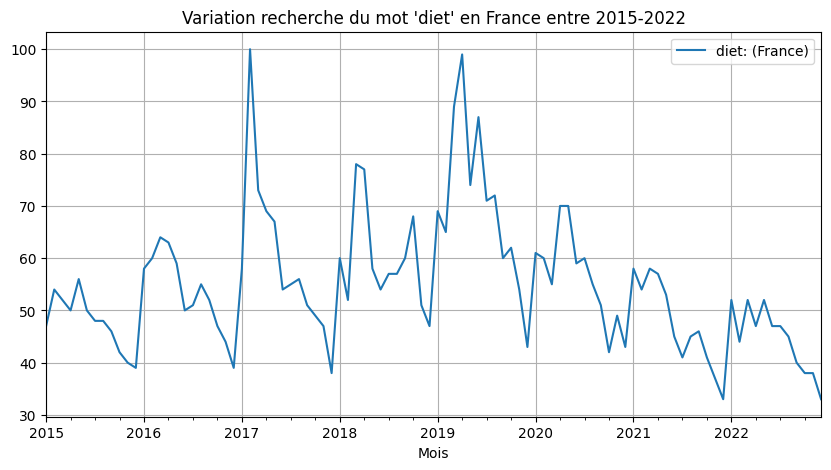

In [7]:
## convertir la date en datetime :
diet.index = pandas.to_datetime(diet.index) ## là on utilise pandas
## mais on aura pu utiliser datetime de Python, plus précis !

## Plotter toute la donnée :
diet.plot(grid=True)
plt.title("Variation recherche du mot 'diet' en France entre 2015-2022")
plt.show()


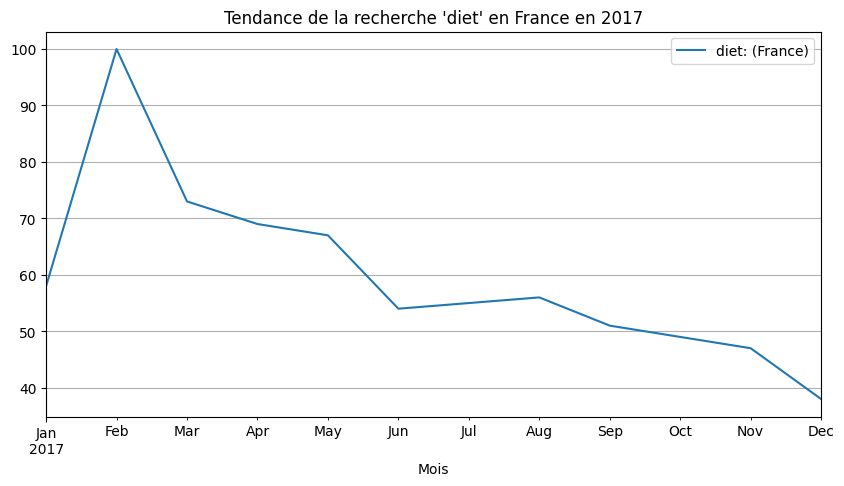

In [9]:
## Se concentrer uniquement sur une année :
diet17 = diet[ diet.index.year == 2017 ]

diet17.plot(grid=True) ;
plt.title("Tendance de la recherche 'diet' en France en 2017") ;
plt.show() ;




In [ ]:
## Merger deux séries temporelles avec des dates différentes

## Corrélation entre deux séries temporelles

In [10]:
stocks = pandas.read_csv('.\\DONNEES\\stocks.csv', index_col=0)
bonds = pandas.read_csv('.\\DONNEES\\bonds.csv', index_col=0)

In [12]:
stocks.index = pandas.to_datetime(stocks.index)
bonds.index = pandas.to_datetime(bonds.index)

In [14]:
## convertir les index des stocks et des bonds en set de donnée :
stock_dates = set(stocks.index)
bond_dates = set(bonds.index)

## La différence entre les sets :
print( stock_dates - bond_dates )

## Puis funsionner les stocks et les bonds :
stocks_and_bonds = stocks.join(bonds, how='inner')
stocks_and_bonds.head()

{Timestamp('2016-10-10 00:00:00'), Timestamp('2012-11-12 00:00:00'), Timestamp('2016-11-11 00:00:00'), Timestamp('2007-10-08 00:00:00'), Timestamp('2011-10-10 00:00:00'), Timestamp('2017-06-09 00:00:00'), Timestamp('2008-10-13 00:00:00'), Timestamp('2015-10-12 00:00:00'), Timestamp('2012-10-08 00:00:00'), Timestamp('2014-11-11 00:00:00'), Timestamp('2013-10-14 00:00:00'), Timestamp('2013-11-11 00:00:00'), Timestamp('2010-11-11 00:00:00'), Timestamp('2015-11-11 00:00:00'), Timestamp('2011-11-11 00:00:00'), Timestamp('2009-11-11 00:00:00'), Timestamp('2010-10-11 00:00:00'), Timestamp('2009-10-12 00:00:00'), Timestamp('2007-11-12 00:00:00'), Timestamp('2008-11-11 00:00:00'), Timestamp('2014-10-13 00:00:00')}


,SP500,US10Y
observation_date,,
2007-06-11,1509.12,5.14
2007-06-12,1493.00,5.26
2007-06-13,1515.67,5.20
2007-06-14,1522.97,5.23
2007-06-15,1532.91,5.16


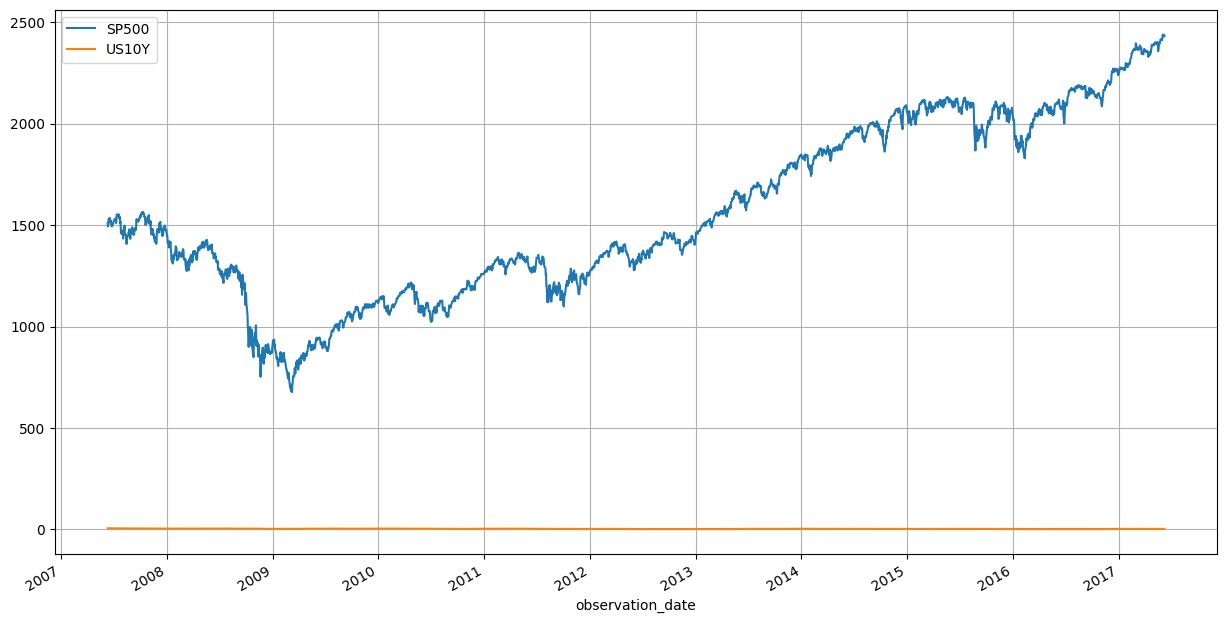

In [17]:
fig, ax = plt.subplots(figsize=(15,8))

stocks_and_bonds["SP500"].plot(ax=ax, grid=True, legend=True) ;
stocks_and_bonds["US10Y"].plot(ax=ax, grid=True, legend=True) ;

plt.show()

## Corrélation enetre deux séries temporelles

Dans le cas de séries temporelles appliquées à la finance, les investisseurs s'intéressent souvent à la corrélation entre le rendement de deux actifs différents à des finds d'allocation d'actifs et de couverture. On va donc chercher à savoir, grâce à un coefficient de corrélation, si les actions sont positivement ou négativement corrélées avec les obligations. On peut recourir aux diagrammes de dispersion pour visualiser les corrélations entre dexu variables. On va (et doit !) calculer les corrélations entre les variations en POURCENTAGE plutôt que sur des niveaux.add()

Remarque : il semblerait qu'on préfère le calcul par des coefficients linéaires plutôt que des coefficents sur des rangs.

Pour faciliter les calculs, on va utiliser la méthode [.pct_change()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) de pandas. Cette méthode "Calcule par défaut le pourcentage de changement par rapport à la ligne immédiatement précédente. Ceci est utile pour comparer le pourcentage de changement dans une série temporelle d'éléments."

In [18]:
## Calculer le pourcentage de change utilisant pct_change() :
returns = stocks_and_bonds.pct_change() 
returns

,SP500,US10Y
observation_date,,
2007-06-11,NaN,NaN
2007-06-12,-0.010682,0.023346
2007-06-13,0.015184,-0.011407
2007-06-14,0.004816,0.005769
2007-06-15,0.006527,-0.013384
...,...,...
2017-06-02,0.003708,-0.027149
2017-06-05,-0.001218,0.013953
2017-06-06,-0.002779,-0.018349


In [19]:
## Ensuite on va calculer la corrélation avec .corr() de pandas :

correlation = returns["SP500"].corr(returns["US10Y"])
print("Corrélation entre les stocks et les taux d'intérêts : ", correlation)

Corrélation entre les stocks et les taux d'intérêts :  0.411944888624927


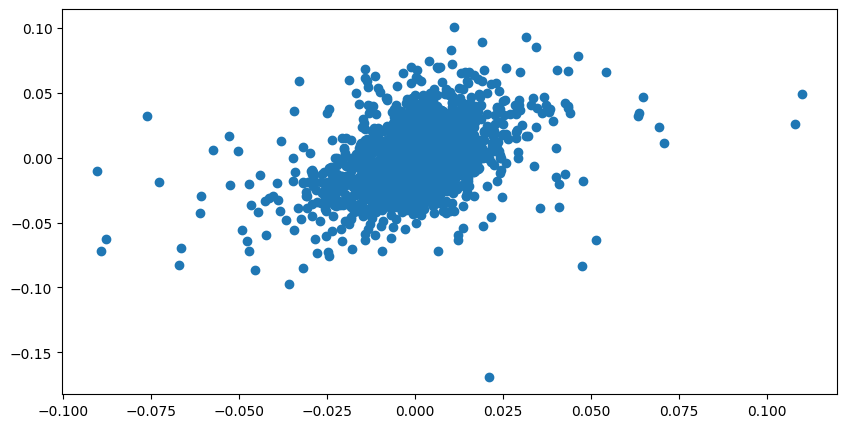

In [20]:
## Ensuite réaliser un scatter plot :
plt.scatter(returns["SP500"], returns["US10Y"]) ;
plt.show()

<div style="text-align:justify;">La corrélation est positive à 0.41, ce qui veut dire qu'il y a une relation positive entre les deux variables testées : les taux d'intérêts baissent, plus les prix des actions baissent. Le 11 septembre, les investisseurs ont vendu leur action, pour placer leur argent dans und es obligations moins risquées ("fuite vers la qualité"). Il existe cependant des périodes où la relation inverse se vérifie.</div>

<div style="text-align:justify; border:2px solid red;">On peut voir que, dans on exemple, la dimension métier semble permettre de s'abstenir de calculer la p-value. La p-value est la valeur p, qui permet d'indiquer si le coefficient de corrélation calculé est fiable, en fonction d'un seuil défini. En sciences sociales, on envisage plutôt le seuil de 5% (5% de risque de se tromper en affirmant H1 plutôt que H0).</div>

## Régression linéaire simple